<a href="https://colab.research.google.com/github/Seemab-zakir/Python-crash-course-file/blob/main/DL_PhD_lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
  #authenticating drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#loading model
fileid1 = drive.CreateFile({'id':"1MVppm5IFG-n5JHbSkqBEmWRKbtqzBIJF"})   # replace the id with id of file you want to access
fileid1.GetContentFile(fileid1['title'])
print('uploaded{},id{}'.format(fileid1['title'],fileid1['id']))

uploadedmodel.json,id1MVppm5IFG-n5JHbSkqBEmWRKbtqzBIJF


In [ ]:
#loading weights
fileid1 = drive.CreateFile({'id':"1wGQGdNycO0IpjisfXgHPcB_sZuB3TghH"})   # replace the id with id of file you want to access
fileid1.GetContentFile(fileid1['title'])
print('uploaded{},id{}'.format(fileid1['title'],fileid1['id']))

uploadedmodel_weights.h5,id1wGQGdNycO0IpjisfXgHPcB_sZuB3TghH


In [ ]:
#importing libraries
import numpy as np
import cv2
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten 
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.models import model_from_json
from keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import matplotlib.pyplot as plt
import itertools
from itertools import cycle
from scipy import interp
from mpl_toolkits.axes_grid1 import make_axes_locatable,axes_size


In [ ]:
#input image dimensions
img_rows,img_cols=28,28
(x_train,y_train),(x_test,y_test)=mnist.load_data()
num_classes=10


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_train = np.expand_dims(x_train, axis=-1)
#x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
x_test = np.expand_dims(x_test, axis=-1)
input_shape=img_rows,img_cols,1
input_shape

(28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


(28, 28)


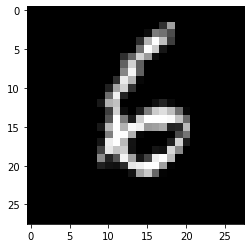

In [ ]:
print(x_test[0,:,:,0].shape)
plt.imshow(x_test[2000,:,:,0],cmap="gray")#for 1 channel in matplotlib we put 0 in place of channel
plt.show()


In [ ]:
y_test[0:3,:]

IndexError: ignored

In [ ]:
#one hot encoded format
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
y_test.shape
y_test[0:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
json_file=open('model.json','r')#r for read
model_json=json_file.read()
json_file.close()
model=model_from_json(model_json)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                      

In [ ]:
model.load_weights('model_weights.h5')



argmax reverse one hot encoded numbers

In [ ]:
y_score=model.predict(x_test)
print(y_score.shape)
y_pred=np.argmax(y_score,axis=1)#return col which has max value
y_test=np.argmax(y_test,axis=1)#axis 0=rows and axis 1=col

313/313 [==============================] - 7s 23ms/step
(10000, 10)


In [ ]:
y_test.shape

(10000, 1)

In [ ]:
print(classification_report(y_test,y_pred))#doesnt acccept hot encoded

              precision    recall  f1-score   support

           0       1.00      0.10      0.18     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.10      0.18     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


macro avg=equal importance to all classes

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion Matrix',cmap=plt.cm.Blues):
  plt.figure(figsize=(4,4),dpi=80)
  im=plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalised confusion matix")
  else:
    print("confusion matix without normalization")
  thresh=cm.max()/2
  for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,round(cm[i,j],2),horizontalalignment='center',color="white"
    if cm[i,j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel("true label")
  plt.xlabel("predricted label")

  ax=plt.gca()
  divider=make_axes_locatable(ax)
  cax=divider.append_axes("right",size="5%",pad=0.05)
  plt.colorbar(im,cax=cax)




 

confusion matix without normalization
normalised confusion matix


<ipython-input-32-94df2a76cbe1>:10: RuntimeWarning: invalid value encountered in true_divide
  cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]


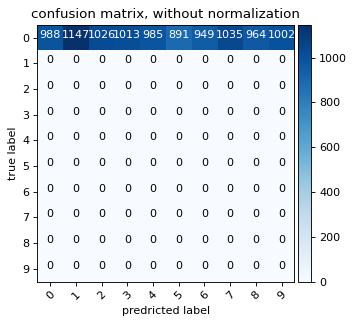

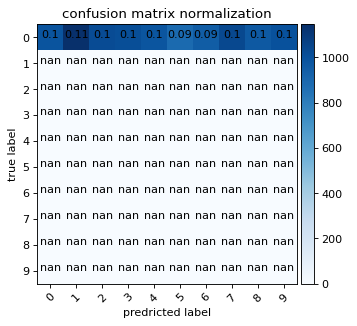

In [ ]:
class_name={0,1,2,3,4,5,6,7,8,9}
cnf_matrix=confusion_matrix(y_test,y_pred)

plot_confusion_matrix(cnf_matrix,classes=class_name,title="confusion matrix, without normalization")

plot_confusion_matrix(cnf_matrix,classes=class_name,normalize=True, title="confusion matrix normalization")
plt.show()

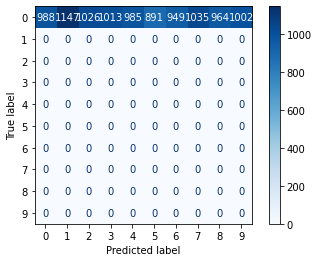

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=list(class_name))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=list(class_name))
disp.plot(cmap='Blues')
plt.show()

In [ ]:
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.42


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:99

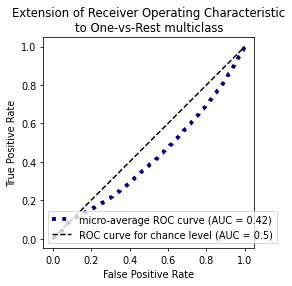

In [ ]:
plt.figure(figsize=(4,4),dpi=70)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()



